<a href="https://colab.research.google.com/github/saha-indranil/ml-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
!pip install -q gradio               # installing gradio

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import gradio as gr

import tensorflow as tf
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Flatten, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


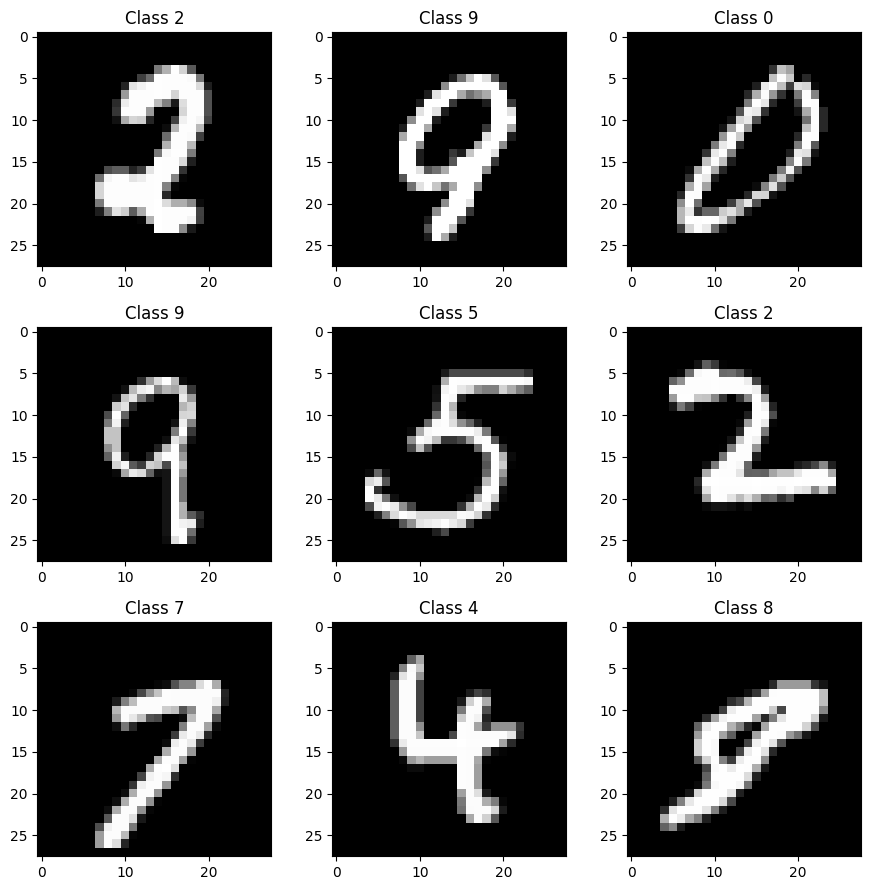

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
# we can ignore it if we want
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   41  154  154  154  154   52   20  0  0  0  0  


In [ ]:
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(200, activation='relu', name="L1"),
    Dense(80, activation='relu', name="L2"),
    Dense(10, activation='linear', name="L3")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(X_train,y_train, batch_size=128, epochs=12, verbose=1)

Epoch 1/12
469/469 [==============================] - 4s 7ms/step - loss: 0.3070 - accuracy: 0.9123
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.1182 - accuracy: 0.9651
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0791 - accuracy: 0.9762
Epoch 4/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0579 - accuracy: 0.9827
Epoch 5/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 7/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0270 - accuracy: 0.9920
Epoch 8/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 9/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 10/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0150 - accuracy:

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9800
Test loss: 0.07316871732473373
Test accuracy: 0.9800000190734863


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


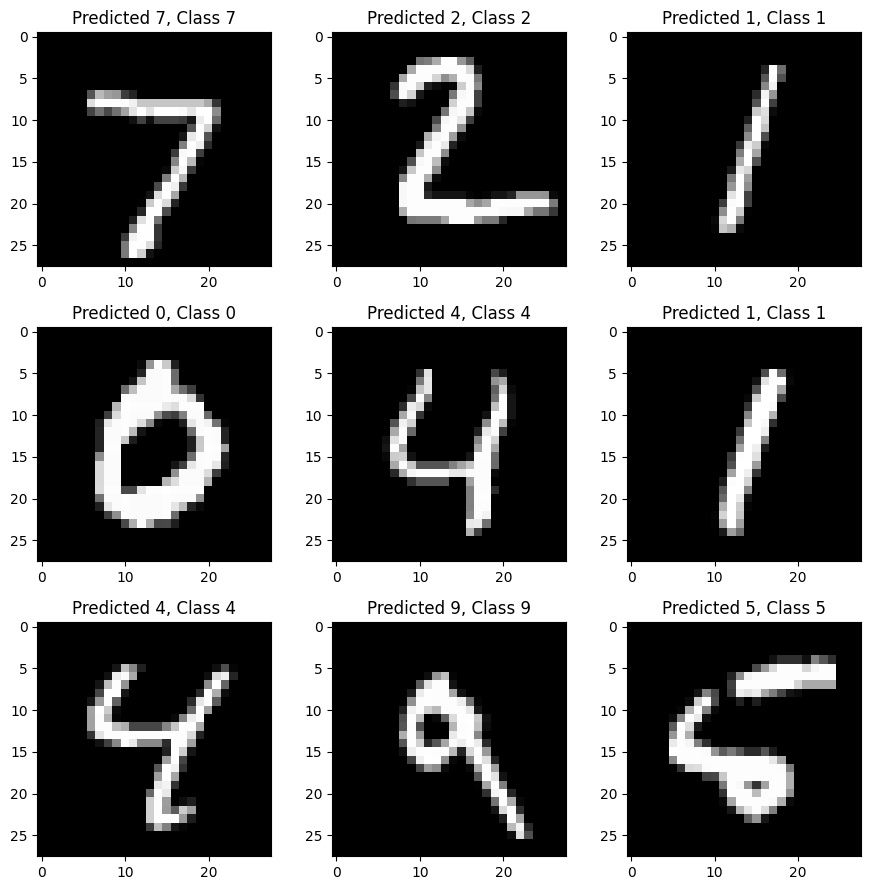

In [ ]:
# Printing right predictions

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

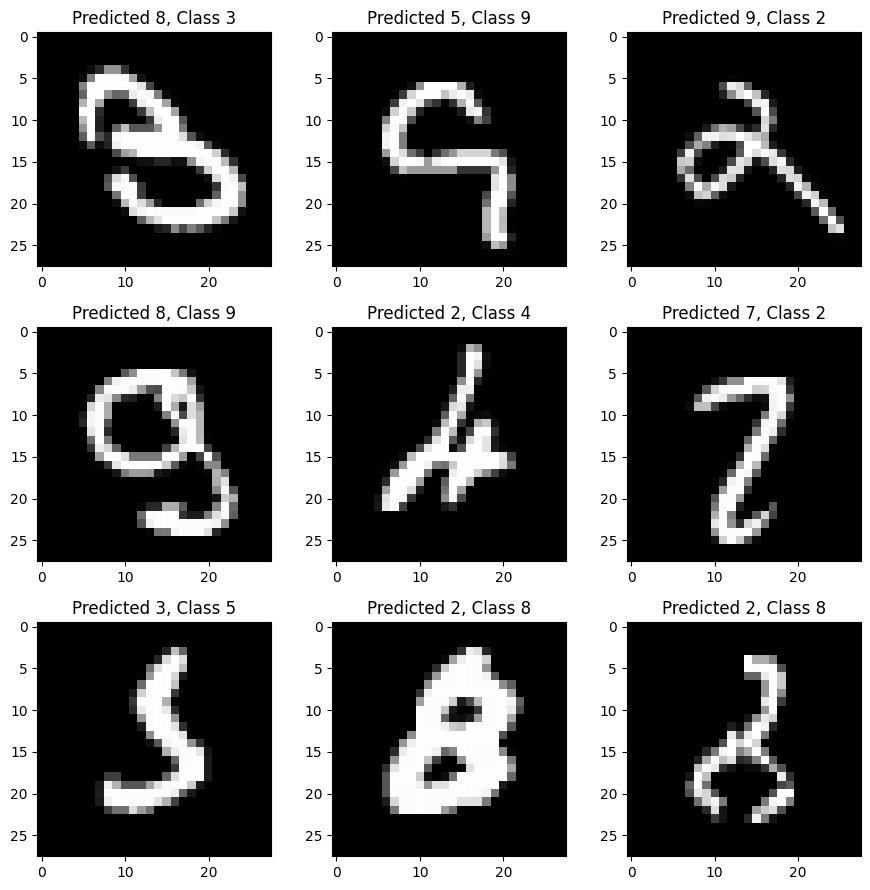

In [ ]:
# Printing wrong predictions

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

In [ ]:
# deploying my model on gradio

from gradio.components.label import Label

def classify(image):
  image = image.reshape(1,784) / 255.0
  prediction = model.predict(image).tolist()[0]
  return {str(i): (prediction[i]/10) for i in range(10)}


label = Label(num_top_classes=3)

demo = gr.Interface(fn = classify,
                    inputs= "sketchpad",
                    outputs= label,
                    live=True,
                    title="Digit Recognition on MNIST dataset",
                    description="Draw a number 0 through 9 on the sketchpad, and see predictions in real time.",
                   )

demo.launch(debug= True, share= True)